## Descrição do problema

<p align="center">
    <img alt="H&M Logo" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/H%26M-Logo.svg/1920px-H%26M-Logo.svg.png" width="200">
</p>

Para este desafio é disponibilizado o histórico de compras dos clientes ao longo do tempo da empresa H&M Group, juntamente com metadados de surporte.
O desafio consiste em prever quais artigos cada cliente comprará no período de 7 dias imediatamente após o términio dos dados de treinamento.
O cliente que não fez nenhuma compra durante esse período é excluído da pontuação.

O conjunto de dados contém 4 arquivos  csv (articles.cvs, customers.cvs, transactions_train.cvs, sample_submission.cvs) e uma pasta com várias subpastas, cada uma com um número diferente de imagens.

O desafio deixa em aberto como será feita a analise e utilizaçãop dos dados para atingir o objetivo.


## Aplicação

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
sns.set_theme(style="ticks", palette="pastel")

In [40]:
transactions = pd.read_csv('data/transactions_train.csv')

In [41]:
articles = pd.read_csv('data/articles.csv')

In [42]:
customers = pd.read_csv('data/customers.csv')

### Analise dos dados

#### Transactions

In [43]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [44]:
transactions.shape

(31788324, 5)

In [45]:
transactions.dtypes

t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id      int64
dtype: object

t_dat: data da transação `Date` (categórico nominal)

customer_id: id do cliente que fez a transação `String` (categórico nominal)

article_id: id do produto (artigo) comprado na transação `int64` (quantitativo discretos)

price: preço do produto comprado `float64` (quantitativo contínuo)

sales_channel_id: canal de vendas utilizado na transação (1 (loja) ou 2 (online)) `Int64` (quantitativo discreto e binário simétrico)

In [46]:
transactions['sales_channel_id'] = transactions['sales_channel_id'].astype(np.int8)
transactions.dtypes

t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id       int8
dtype: object

In [47]:
transactions.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [48]:
pd.get_dummies(transactions["sales_channel_id"]).head()

,1,2
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [49]:
display(transactions['customer_id'].value_counts()[:10])

be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
Name: customer_id, dtype: int64

In [50]:
display(transactions['article_id'].value_counts()[:10])

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
464297007    25025
372860002    24458
610776001    22451
399223001    22236
706016003    21241
Name: article_id, dtype: int64

In [51]:
print('The number of customers: ', transactions['customer_id'].nunique())
print('The number of articles: ', transactions['article_id'].nunique())

The number of customers:  1362281
The number of articles:  104547


In [52]:
max_x = transactions['t_dat'].max()
min_x = transactions['t_dat'].min()
print(f"Início: {min_x}\nFim: {max_x}")

Início: 2018-09-20
Fim: 2020-09-22


Dados de transações em um intervalo de 2 anos e 2 dias

#### Articles

In [53]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


article_id : Identificador unico de cada artigo

product_code, prod_name : Identificador unico para cada produto e seu nome

product_type, product_type_name : Grupo no qual o produto pertece pelo código e seu nome

graphical_appearance_no, graphical_appearance_name : Grupo de "aparência gráfica" e seu nome

colour_group_code, colour_group_name : Grupo de cores e seu nome

perceived_colour_value_id, perceived_colour_value_name, perceived_colour_master_id, perceived_colour_master_name : Informações de cores adicionais

department_no, department_name: : Identificador unico de cada departamento e seu nome

index_code, index_name: : ??

index_group_no, index_group_name: : ??

section_no, section_name: : Identificador unico de cada seção e seu nome

garment_group_no, garment_group_name: : Identificador unico de cada peça de roupa e seu nome

detail_desc: : Detalhes

In [55]:
articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [56]:
#preenchendo valor null em detail_desc
articles['detail_desc'].fillna("empty description", inplace=True)

In [57]:
articles.isnull().sum()

article_id                      0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no                  0
index_group_name                0
section_no                      0
section_name                    0
garment_group_no                0
garment_group_name              0
detail_desc                     0
dtype: int64

In [59]:
articles.drop(['product_type_name', 'graphical_appearance_name','colour_group_name','perceived_colour_value_name','perceived_colour_master_name','department_name','index_name','index_group_name','section_name','garment_group_name','prod_name', 'index_group_name'], axis=1, inplace=True)

In [61]:
articles.dtypes

article_id                     int64
product_code                   int64
product_type_no                int64
product_group_name            object
graphical_appearance_no        int64
colour_group_code              int64
perceived_colour_value_id      int64
perceived_colour_master_id     int64
department_no                  int64
index_code                    object
index_group_no                 int64
section_no                     int64
garment_group_no               int64
detail_desc                   object
dtype: object

In [78]:
articles

,article_id,product_code,product_type_no,product_group_name,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_code,index_group_no,section_no,garment_group_no,detail_desc
0,108775015,108775,253,Garment Upper body,1010016,9,4,5,1676,A,1,16,1002,Jersey top with narrow shoulder straps.
1,108775044,108775,253,Garment Upper body,1010016,10,3,9,1676,A,1,16,1002,Jersey top with narrow shoulder straps.
2,108775051,108775,253,Garment Upper body,1010017,11,1,9,1676,A,1,16,1002,Jersey top with narrow shoulder straps.
3,110065001,110065,306,Underwear,1010016,9,4,5,1339,B,1,61,1017,"Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,306,Underwear,1010016,10,3,9,1339,B,1,61,1017,"Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,302,Socks & Tights,1010014,9,4,5,7188,F,3,26,1021,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,253,Garment Upper body,1010016,9,4,5,1919,A,1,2,1005,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,265,Garment Full body,1010016,9,4,5,1641,A,1,18,1005,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,72,Accessories,1010016,9,4,5,3946,D,2,52,1019,Large plastic hair claw.


In [175]:
def iqr_fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    u = max(x[x<Upper_Fence])
    l = min(x[x>Lower_Fence])
    return [u,l]

In [98]:
#IQR (Intervalo Interquartil)
def interval_interquartil(dt, col):
  Q1=dt[col].quantile(0.25)
  Q3=dt[col].quantile(0.75)
  IQR=Q3-Q1
  whisker_width = 1.5
  return dt[(dt[col] < Q1 - whisker_width*IQR) | (dt[col] > Q3 + whisker_width*IQR)]

In [119]:
def not_interval_interquartil(dt, col):
  Q1=dt[col].quantile(0.25)
  Q3=dt[col].quantile(0.75)
  IQR=Q3-Q1
  whisker_width = 1.5
  return dt[(dt[col] > Q1 - whisker_width*IQR) & (dt[col] < Q3 + whisker_width*IQR)]

In [68]:
def graph(dt, col):
    plt.figure(figsize=[16,4])
    plt.suptitle('[' + col + ']')

    plt.subplot(1, 2, 1)
    dt[col].value_counts().plot(kind='bar')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=col, data=dt)

In [88]:
def graph__plot(dt, col):
    dt[col].value_counts().plot(kind='bar')

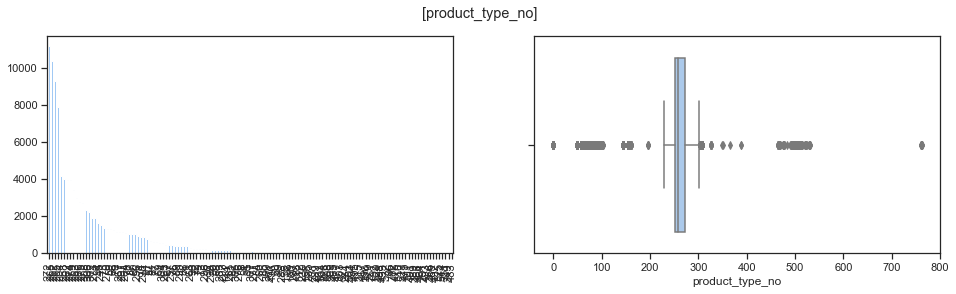

In [75]:
graph(articles, 'product_type_no')

In [113]:
interval_interquartil(articles, 'product_type_no')['product_type_no'].value_counts()

308    2356
306    2212
94     1621
75     1349
59     1307
       ... 
525       1
514       1
351       1
349       1
483       1
Name: product_type_no, Length: 89, dtype: int64

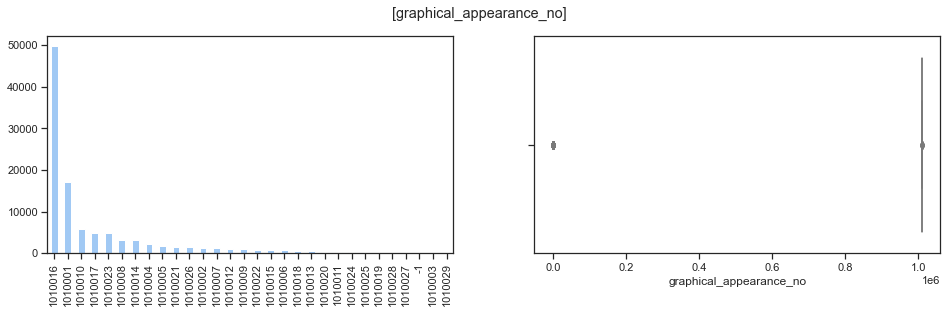

In [77]:
graph(articles, 'graphical_appearance_no')

In [101]:
interval_interquartil(articles, 'graphical_appearance_no')['graphical_appearance_no'].value_counts()

-1          52
 1010029     8
Name: graphical_appearance_no, dtype: int64

In [102]:
max_x = articles['graphical_appearance_no'].max()
min_x = articles['graphical_appearance_no'].min()
print(f"Min: {min_x}  Max: {max_x}")

Min: -1  Max: 1010029


In [105]:
max_x = articles.loc[articles['graphical_appearance_no'] != 1010029]['graphical_appearance_no'].max()
min_x = articles.loc[articles['graphical_appearance_no'] != -1]['graphical_appearance_no'].min()
print(f"Min: {min_x}  Max: {max_x}")

Min: 1010001  Max: 1010028


In [106]:
articles.loc[articles['graphical_appearance_no'] == -1, ['graphical_appearance_no']] = 1010000

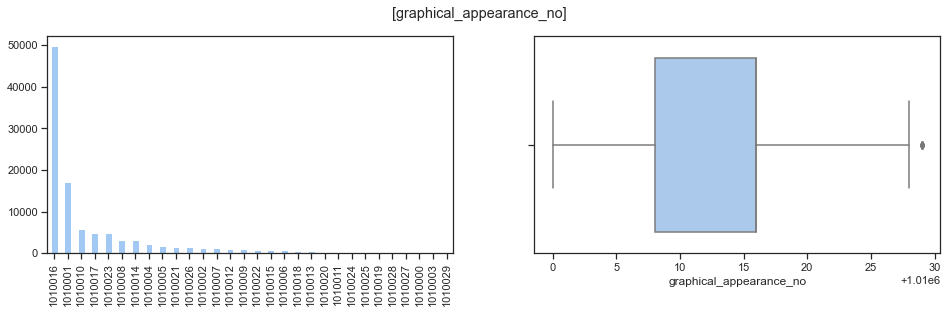

In [107]:
graph(articles, 'graphical_appearance_no')

In [108]:
interval_interquartil(articles, 'graphical_appearance_no')['graphical_appearance_no'].value_counts()

1010029    8
Name: graphical_appearance_no, dtype: int64

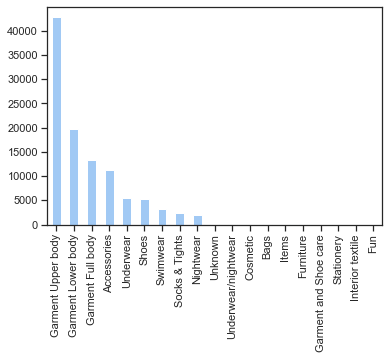

In [89]:
graph__plot(articles, 'product_group_name')

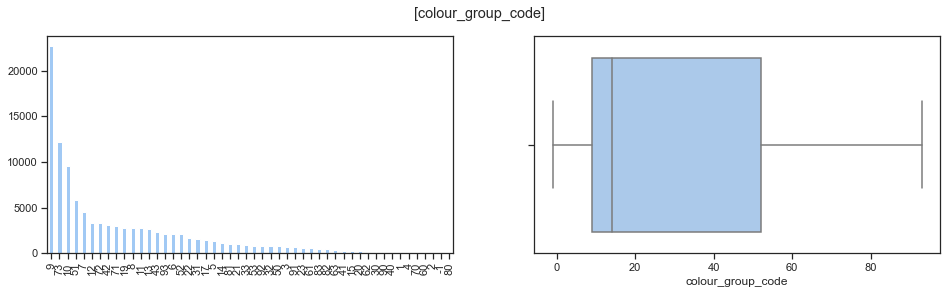

In [80]:
graph(articles, 'colour_group_code')

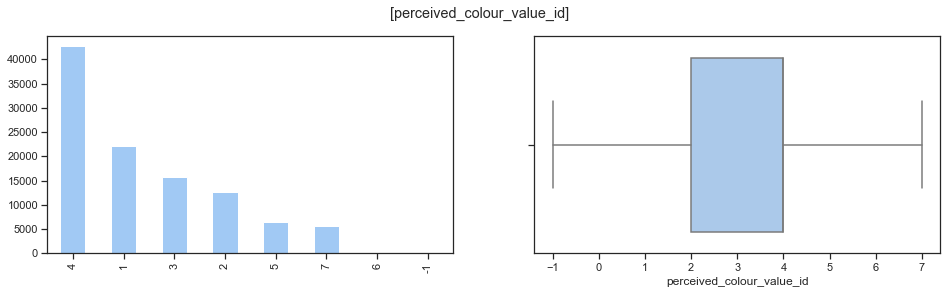

In [81]:
graph(articles, 'perceived_colour_value_id')

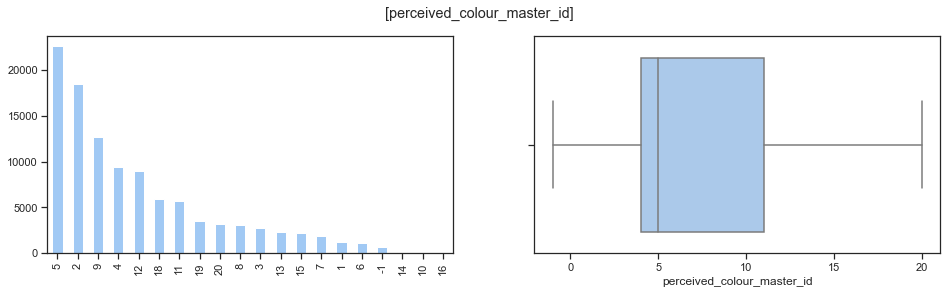

In [82]:
graph(articles, 'perceived_colour_master_id')

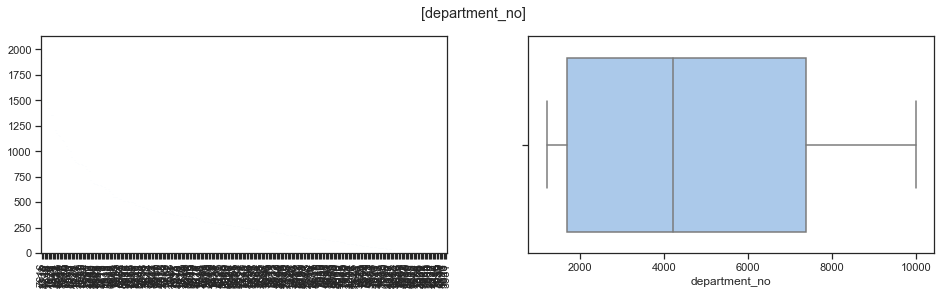

In [83]:
graph(articles, 'department_no')

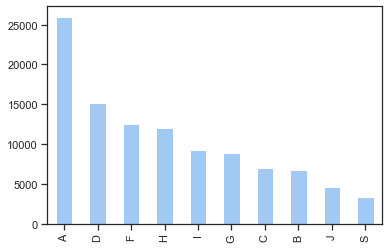

In [90]:
graph__plot(articles, 'index_code')

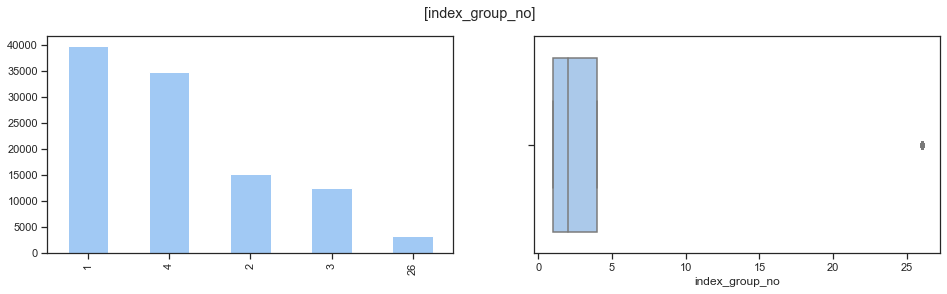

In [85]:
graph(articles, 'index_group_no')

In [94]:
print(articles['index_group_no'].value_counts())

1     39737
4     34711
2     15149
3     12553
26     3392
Name: index_group_no, dtype: int64


In [95]:
articles.loc[articles['index_group_no'] == 26, ['index_group_no']] = 5

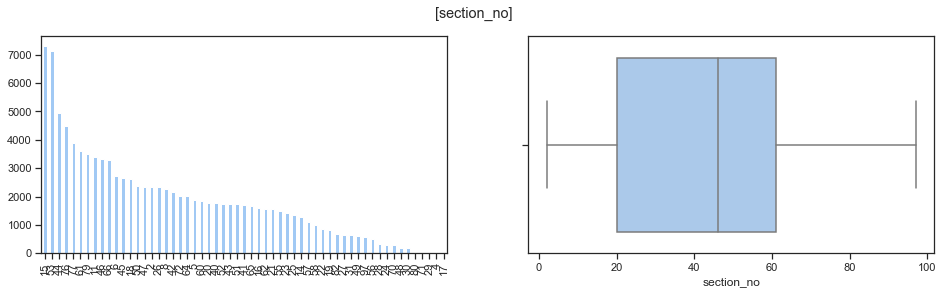

In [86]:
graph(articles, 'section_no')

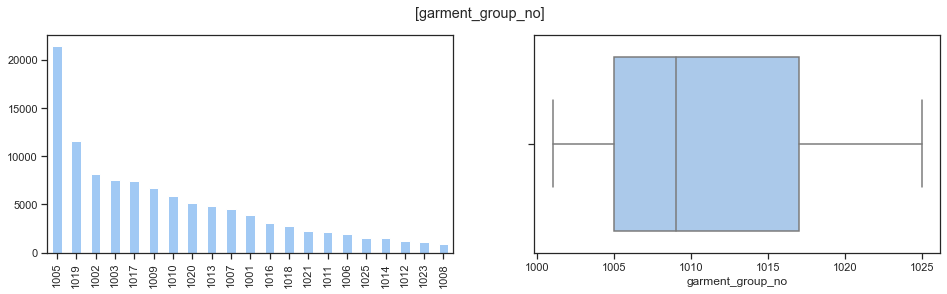

In [87]:
graph(articles, 'garment_group_no')

In [93]:
print(articles['detail_desc'].value_counts())

empty description                                                                                                                                                                                                        416
T-shirt in printed cotton jersey.                                                                                                                                                                                        159
Leggings in soft organic cotton jersey with an elasticated waist.                                                                                                                                                        138
T-shirt in soft, printed cotton jersey.                                                                                                                                                                                  137
Socks in a soft, jacquard-knit cotton blend with elasticated tops.                                                  

In [96]:
print(articles['product_group_name'].value_counts())

Garment Upper body       42741
Garment Lower body       19812
Garment Full body        13292
Accessories              11158
Underwear                 5490
Shoes                     5283
Swimwear                  3127
Socks & Tights            2442
Nightwear                 1899
Unknown                    121
Underwear/nightwear         54
Cosmetic                    49
Bags                        25
Items                       17
Furniture                   13
Garment and Shoe care        9
Stationery                   5
Interior textile             3
Fun                          2
Name: product_group_name, dtype: int64


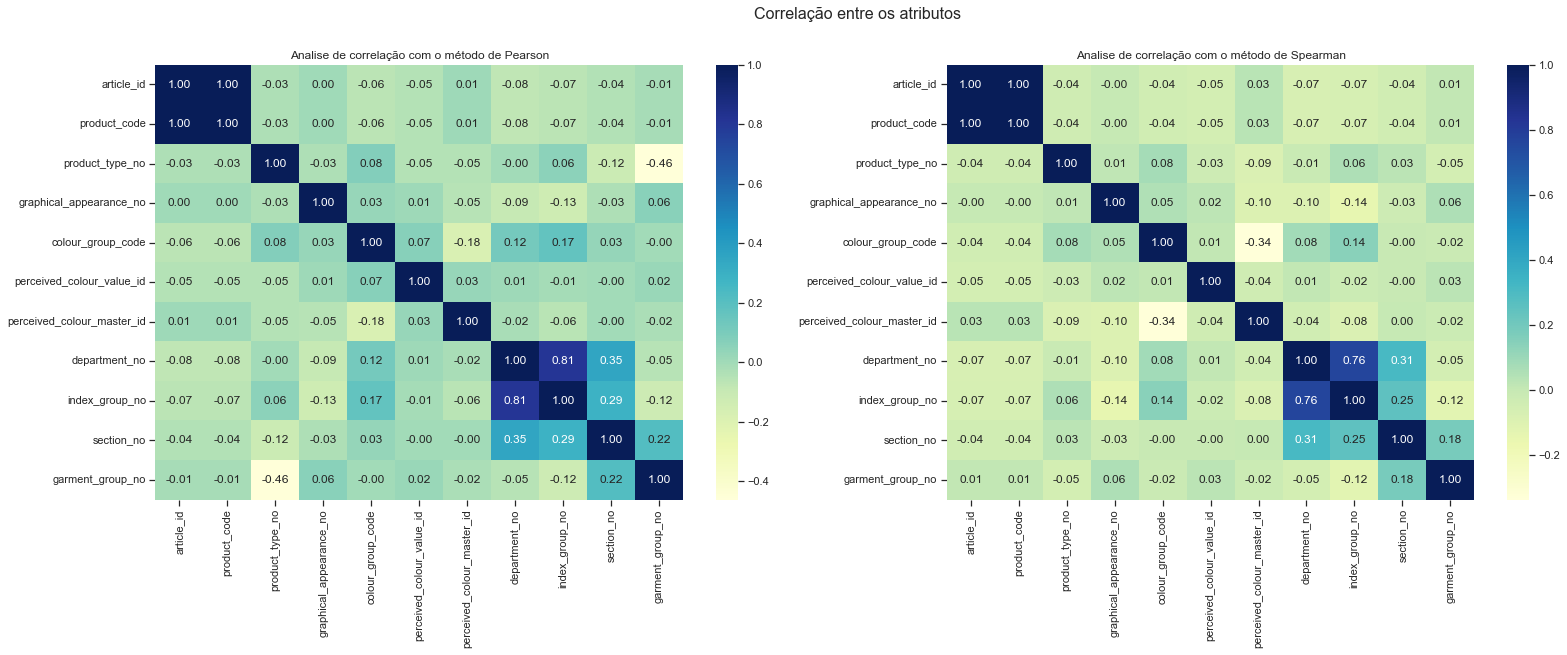

In [140]:
plt.figure(figsize=(26, 8))
plt.suptitle('Correlação entre os atributos', fontsize=16)

plt.subplot(1, 2, 1)
plt.title('Analise de correlação com o método de Pearson')
sns.heatmap(articles.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f');

plt.subplot(1, 2, 2)
plt.title('Analise de correlação com o método de Spearman')
sns.heatmap(articles.corr(method="spearman"), annot = True, cmap= 'YlGnBu', fmt= '.2f');

#### Customers

In [141]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [142]:
customers.dtypes

customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object

customer_id: id do cliente `String` (categórico nominal)

FN: Se o se um cliente receber o boletim informativo de notícias de moda `int` (quantitativo discreto e binário assimétrico)

Active: indicação se o cliente é ativo `int` (quantitativo discreto e binário assimétrico)

club_member_status: status do cliente no clube de membros [ACTIVE, LEFT CLUB,PRE-CREATE] `String` (categórico nominal)

fashion_news_frequency: frequencia de acompanhamento de nótivias da moda [Monthly e Regularly] `String` (categórico ordinal)

age: idade do cliente `float64` (quantitativo contínuo)

postal_code: codigo postal do cliente criptografado `String` (categórico nominal)

In [143]:
customers = customers.rename(columns={"FN":"fashion_news_newsletter", "Active": "active_communication"})

In [144]:
customers.shape

(1371980, 7)

1371980 (quantidade de clientes em customers) - 1362281 (quantidade de clientes que fizeram uma compra em transactions) = 9699 

Logo tem que 9699 não possuem dados de compra

- Eliminando rows da tabela customers que possui clientes qua não possuem dados de compras em transactions

In [145]:
transactions_customers = transactions['customer_id'].unique()

In [146]:
len(transactions_customers)

1362281

In [147]:
customers = customers[customers['customer_id'].isin(transactions_customers)]
customers

,customer_id,fashion_news_newsletter,active_communication,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [148]:
customers.shape

(1362281, 7)

In [149]:
customers.isnull().sum()

customer_id                     0
fashion_news_newsletter    888922
active_communication       901382
club_member_status           6054
fashion_news_frequency      15999
age                         15761
postal_code                     0
dtype: int64

In [151]:
pd.get_dummies(customers["fashion_news_newsletter"]).head()

,1.0
0,0
1,0
2,0
3,0
4,1


In [152]:
customers['fashion_news_newsletter'].fillna(0, inplace=True)

<AxesSubplot:>

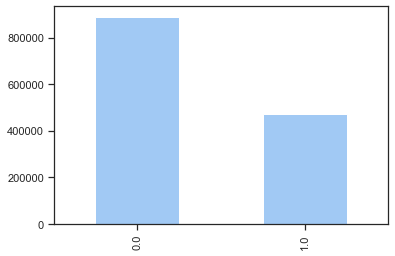

In [153]:
customers['fashion_news_newsletter'].value_counts().plot(kind='bar')

In [154]:
pd.get_dummies(customers["active_communication"]).head()

,1.0
0,0
1,0
2,0
3,0
4,1


In [155]:
customers['active_communication'].fillna(0, inplace=True)

<AxesSubplot:>

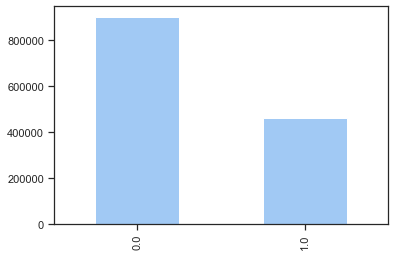

In [156]:
customers['active_communication'].value_counts().plot(kind='bar')

In [157]:
pd.get_dummies(customers["fashion_news_frequency"]).head()

,Monthly,NONE,None,Regularly
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1


In [158]:
customers.loc[customers['fashion_news_frequency'] == 'None']

,customer_id,fashion_news_newsletter,active_communication,club_member_status,fashion_news_frequency,age,postal_code
898114,a79d9cbfaceb0d25a91caccfad167d4d6391fd5bb4292b...,1.0,0.0,ACTIVE,None,38.0,58b7c5c27f8b5e8118a9786379601a344ab2e141550d93...


In [159]:
customers.loc[customers['fashion_news_frequency'] == 'None', ['fashion_news_frequency']] = "NONE"

In [165]:
customers["fashion_news_frequency"].fillna("NONE", inplace=True)

In [166]:
print(customers['fashion_news_frequency'].value_counts())

NONE         887598
Regularly    473843
Monthly         840
Name: fashion_news_frequency, dtype: int64


In [161]:
pd.get_dummies(customers["club_member_status"]).head()

,ACTIVE,LEFT CLUB,PRE-CREATE
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [162]:
customers['club_member_status'].fillna("NEVER JOINED", inplace=True)

ACTIVE          1263183
PRE-CREATE        92578
NEVER JOINED       6054
LEFT CLUB           466
Name: club_member_status, dtype: int64


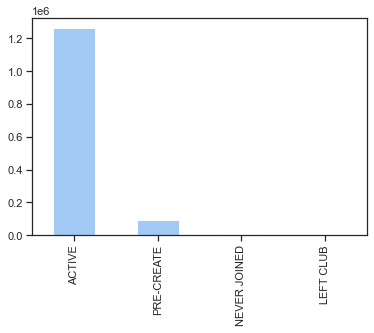

In [163]:
customers.club_member_status.value_counts().plot(kind='bar')
print(customers.club_member_status.value_counts())

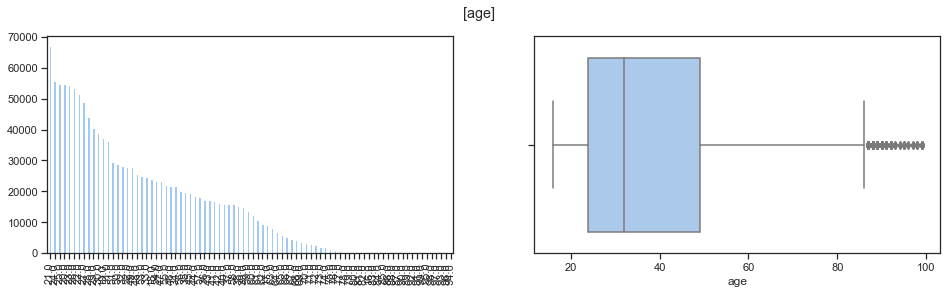

In [168]:
graph(customers, 'age')

In [169]:
max_x = customers['age'].max()
min_x = customers['age'].min()
print(f"Min: {min_x}  Max: {max_x}")

Min: 16.0  Max: 99.0


In [177]:
max_age, min_age = iqr_fence(customers['age'])
print(f"Min: {min_age}  Max: {max_age}")

Min: 16.0  Max: 86.0


In [171]:
interval_interquartil(customers, 'age')['age'].value_counts()

88.0    48
87.0    41
90.0    24
89.0    23
92.0    17
91.0    16
99.0    13
95.0    10
98.0     7
97.0     4
93.0     4
96.0     3
94.0     3
Name: age, dtype: int64

In [179]:
customers.loc[customers['age'] > max_age, ['age']] = max_age

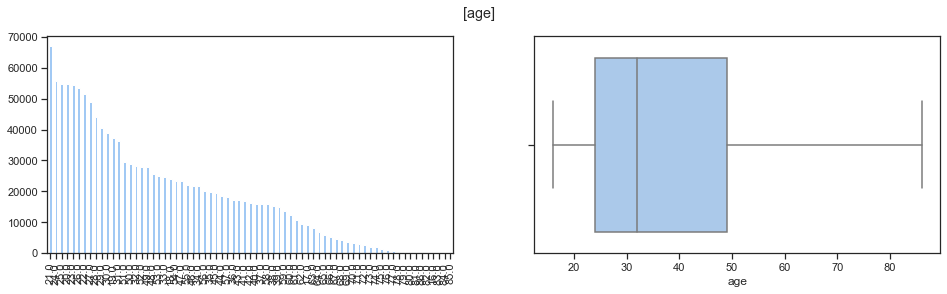

In [180]:
graph(customers, 'age')

In [182]:
customers["age"].fillna(0, inplace=True)

In [183]:
customers.isnull().sum()

customer_id                0
fashion_news_newsletter    0
active_communication       0
club_member_status         0
fashion_news_frequency     0
age                        0
postal_code                0
dtype: int64

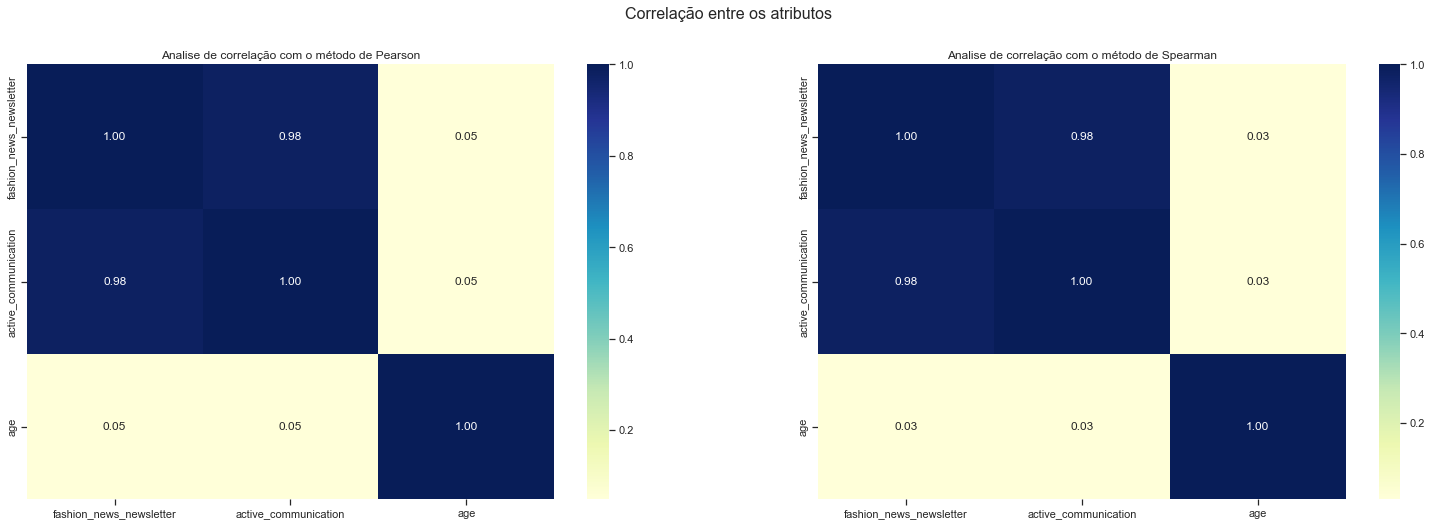

In [184]:
plt.figure(figsize=(26, 8))
plt.suptitle('Correlação entre os atributos', fontsize=16)

plt.subplot(1, 2, 1)
plt.title('Analise de correlação com o método de Pearson')
sns.heatmap(customers.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f');

plt.subplot(1, 2, 2)
plt.title('Analise de correlação com o método de Spearman')
sns.heatmap(customers.corr(method="spearman"), annot = True, cmap= 'YlGnBu', fmt= '.2f');

In [210]:
customers

,customer_id,fashion_news_newsletter,active_communication,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


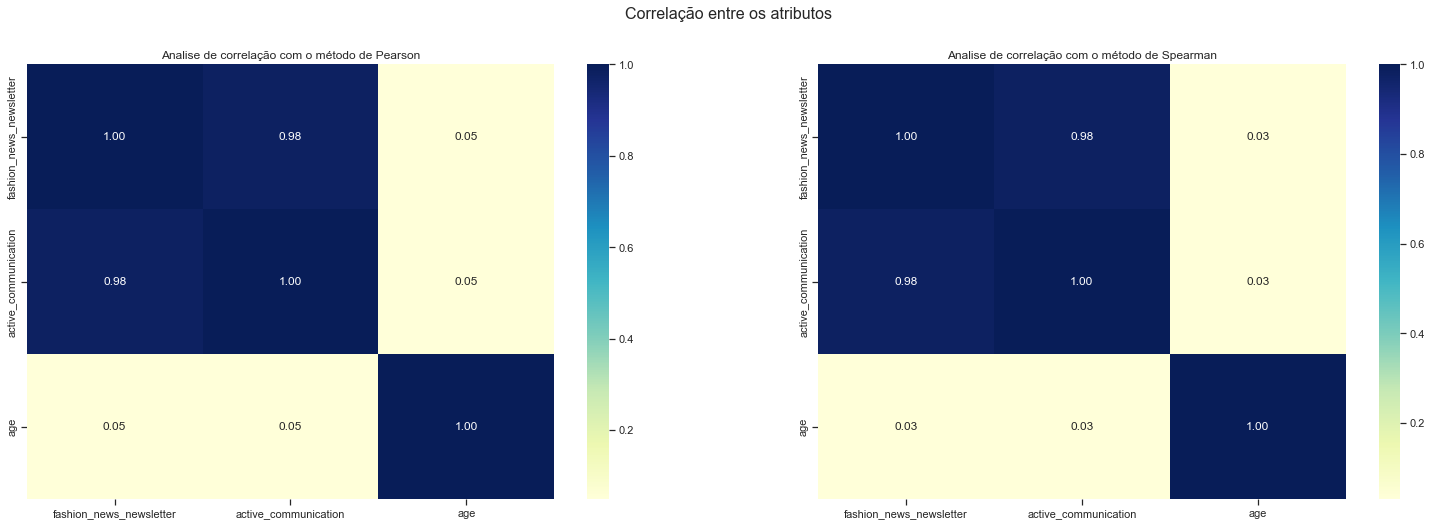

In [211]:
plt.figure(figsize=(26, 8))
plt.suptitle('Correlação entre os atributos', fontsize=16)

plt.subplot(1, 2, 1)
plt.title('Analise de correlação com o método de Pearson')
sns.heatmap(customers.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f');

plt.subplot(1, 2, 2)
plt.title('Analise de correlação com o método de Spearman')
sns.heatmap(customers.corr(method="spearman"), annot = True, cmap= 'YlGnBu', fmt= '.2f');

# Transformações

In [247]:
def normalize(dt, attribute):
  dt[attribute] = (dt[attribute] - dt[attribute].min()) / (dt[attribute].max() - dt[attribute].min())

In [213]:
from sklearn.preprocessing import OneHotEncoder

In [214]:
customers.head()

,customer_id,fashion_news_newsletter,active_communication,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [239]:
c_customers = customers.copy()

In [240]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(c_customers[['club_member_status']]).toarray())

c_customers = c_customers.join(encoder_df)
c_customers.head()

,customer_id,fashion_news_newsletter,active_communication,club_member_status,fashion_news_frequency,age,postal_code,0,1,2,3
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,1.0,0.0,0.0,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,1.0,0.0,0.0,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1.0,0.0,0.0,0.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,1.0,0.0,0.0,0.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,1.0,0.0,0.0,0.0


In [241]:
c_customers.loc[c_customers['club_member_status'] == 'LEFT CLUB']

,customer_id,fashion_news_newsletter,active_communication,club_member_status,fashion_news_frequency,age,postal_code,0,1,2,3
5127,00fa6e1d4a247e2c81996af566b8aafd5cf766121d6906...,0.0,0.0,LEFT CLUB,NONE,39.0,03054b9069cb7830e9084980e96afc5ee220c395659f5d...,0.0,1.0,0.0,0.0
5455,0108c5cb6d8a9103de36474ffc70c508fa9c361fc90b05...,0.0,0.0,LEFT CLUB,NONE,53.0,b1d7e3725c3e52e48b03dd9fb1dca2f48272b43ea12c53...,0.0,1.0,0.0,0.0
11281,021c897da6d36da705952b4ecc46e641b811e094d67f68...,0.0,0.0,LEFT CLUB,NONE,19.0,f3ed5b9f7351a622b27771a8a774b18d3fdf72e8a2824d...,0.0,1.0,0.0,0.0
11359,02206adfebc3ceec651aee86a3cbb7db83bdbd44aff406...,0.0,0.0,LEFT CLUB,NONE,71.0,4e6b8bb7b24bef6613f27a7dff9d1f7e2529e8fb5afe71...,0.0,1.0,0.0,0.0
14762,02c3a111a4fce8b061a6baad19f1ca5322c3bea8386253...,0.0,0.0,LEFT CLUB,NONE,29.0,d9cd3c751184e4e1bdd644ff460a7914f0ea412a929125...,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1353638,fe5d81720a2ad64193c11617c7cfd069fc61d22f369837...,0.0,0.0,LEFT CLUB,NONE,61.0,446e24226e1385f8196498423acf5492cc970c35930124...,0.0,1.0,0.0,0.0
1356905,fef8818faad84d92289fec9432ca848e56fb87e76073e9...,0.0,0.0,LEFT CLUB,NONE,25.0,79a0e01f5c80c1a5d4b79599a1cda82d911b7454176128...,0.0,1.0,0.0,0.0
1357441,ff128a0ed5bde04a8105c5d24fd2d141bca7cd1c3490c1...,0.0,0.0,LEFT CLUB,NONE,44.0,719b891c5f4670362f8926e240c87dd3da7b253b2d8193...,0.0,1.0,0.0,0.0
1361228,ffcc4dd5f7d2dc78a86729c8d6133debd17671cbbc52a8...,0.0,0.0,LEFT CLUB,NONE,45.0,1dde45116c3d44d78ec1a94662a328c997d5b5df137dee...,0.0,1.0,0.0,0.0


In [242]:
c_customers.rename(columns = {0:'club_member_status_ACTIVE', 1:'club_member_status_LEFT_CLUB', 2:'club_member_status_NEVER_JOINED', 3:'club_member_status_PRE_CREATE'}, inplace = True)
c_customers.drop(['club_member_status'], axis=1, inplace=True)
c_customers.head()


,customer_id,fashion_news_newsletter,active_communication,fashion_news_frequency,age,postal_code,club_member_status_ACTIVE,club_member_status_LEFT_CLUB,club_member_status_NEVER_JOINED,club_member_status_PRE_CREATE
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,1.0,0.0,0.0,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,1.0,0.0,0.0,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1.0,0.0,0.0,0.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,1.0,0.0,0.0,0.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,1.0,0.0,0.0,0.0


In [244]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')
#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(c_customers[['fashion_news_frequency']]).toarray())
c_customers = c_customers.join(encoder_df)
c_customers.head()

,customer_id,fashion_news_newsletter,active_communication,fashion_news_frequency,age,postal_code,club_member_status_ACTIVE,club_member_status_LEFT_CLUB,club_member_status_NEVER_JOINED,club_member_status_PRE_CREATE,0,1,2
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [245]:
c_customers.rename(columns = {0:'fashion_news_frequency_MONTHLY', 1:'fashion_news_frequency_NONE', 2:'fashion_news_frequency_REGULARLY'}, inplace = True)
c_customers.drop(['fashion_news_frequency'], axis=1, inplace=True)
c_customers.head()

,customer_id,fashion_news_newsletter,active_communication,age,postal_code,club_member_status_ACTIVE,club_member_status_LEFT_CLUB,club_member_status_NEVER_JOINED,club_member_status_PRE_CREATE,fashion_news_frequency_MONTHLY,fashion_news_frequency_NONE,fashion_news_frequency_REGULARLY
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [248]:
normalize(c_customers, 'age')

In [249]:
c_customers.head()

,customer_id,fashion_news_newsletter,active_communication,age,postal_code,club_member_status_ACTIVE,club_member_status_LEFT_CLUB,club_member_status_NEVER_JOINED,club_member_status_PRE_CREATE,fashion_news_frequency_MONTHLY,fashion_news_frequency_NONE,fashion_news_frequency_REGULARLY
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,0.569767,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,0.290698,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,0.279070,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,0.627907,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,0.604651,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [253]:
articles.drop(['product_group_name'], axis=1, inplace=True)

In [254]:
c_articles = articles.copy()

In [255]:
c_articles.head()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_code,index_group_no,section_no,garment_group_no,detail_desc
0,108775015,108775,253,1010016,9,4,5,1676,A,1,16,1002,Jersey top with narrow shoulder straps.
1,108775044,108775,253,1010016,10,3,9,1676,A,1,16,1002,Jersey top with narrow shoulder straps.
2,108775051,108775,253,1010017,11,1,9,1676,A,1,16,1002,Jersey top with narrow shoulder straps.
3,110065001,110065,306,1010016,9,4,5,1339,B,1,61,1017,"Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,306,1010016,10,3,9,1339,B,1,61,1017,"Microfibre T-shirt bra with underwired, moulde..."


In [256]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(c_articles[['index_code']]).toarray())
c_articles = c_articles.join(encoder_df)
c_articles.head()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_code,index_group_no,...,0,1,2,3,4,5,6,7,8,9
0,108775015,108775,253,1010016,9,4,5,1676,A,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108775044,108775,253,1010016,10,3,9,1676,A,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,108775051,108775,253,1010017,11,1,9,1676,A,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,110065001,110065,306,1010016,9,4,5,1339,B,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,110065002,110065,306,1010016,10,3,9,1339,B,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [265]:
c_articles.loc[c_articles['index_code'] == 'S'].head()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_code,index_group_no,...,0,1,2,3,4,5,6,7,8,9
40,145872001,145872,252,1010016,9,4,5,8559,S,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,145872037,145872,252,1010010,8,4,12,8559,S,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42,145872043,145872,252,1010016,10,3,9,8559,S,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
43,145872051,145872,254,1010010,9,4,5,8559,S,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44,145872052,145872,252,1010010,73,4,2,8559,S,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [266]:
c_articles.rename(columns = {
    0:'index_code_A', 
    1:'index_code_B', 
    2:'index_code_C',
    3:'index_code_D',
    4:'index_code_F',
    5:'index_code_G',
    6:'index_code_H',
    7:'index_code_I',
    8:'index_code_J',
    9:'index_code_S',
    }, inplace = True)
c_articles.head()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_code,index_group_no,...,index_code_A,index_code_B,index_code_C,index_code_D,index_code_F,index_code_G,index_code_H,index_code_I,index_code_J,index_code_S
0,108775015,108775,253,1010016,9,4,5,1676,A,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108775044,108775,253,1010016,10,3,9,1676,A,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,108775051,108775,253,1010017,11,1,9,1676,A,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,110065001,110065,306,1010016,9,4,5,1339,B,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,110065002,110065,306,1010016,10,3,9,1339,B,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


![image](https://miro.medium.com/max/1400/1*0FDsAB9OelxojfmtkcLbgw.png)

In [212]:
count_transactions = transactions['customer_id'].value_counts().rename_axis('customer_id').reset_index(name='n_transactions')

In [268]:
c_transactions = transactions.copy()

In [269]:
transactions_join_customers = pd.merge(c_transactions, c_customers, on="customer_id", how="left")

In [270]:
transactions_join_customers.head()

,t_dat,customer_id,article_id,price,sales_channel_id,fashion_news_newsletter,active_communication,age,postal_code,club_member_status_ACTIVE,club_member_status_LEFT_CLUB,club_member_status_NEVER_JOINED,club_member_status_PRE_CREATE,fashion_news_frequency_MONTHLY,fashion_news_frequency_NONE,fashion_news_frequency_REGULARLY
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,0.0,0.0,0.279070,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,0.0,0.0,0.279070,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1.0,1.0,0.372093,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,1.0,1.0,0.372093,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,1.0,1.0,0.372093,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [271]:
transactions_join_customers.shape

(31788324, 16)

In [272]:
dt = pd.merge(transactions_join_customers, c_articles, on="article_id", how="left")

In [273]:
dt.shape

(31788324, 38)

In [274]:
dt.isnull().sum()

t_dat                               0
customer_id                         0
article_id                          0
price                               0
sales_channel_id                    0
fashion_news_newsletter             0
active_communication                0
age                                 0
postal_code                         0
club_member_status_ACTIVE           0
club_member_status_LEFT_CLUB        0
club_member_status_NEVER_JOINED     0
club_member_status_PRE_CREATE       0
fashion_news_frequency_MONTHLY      0
fashion_news_frequency_NONE         0
fashion_news_frequency_REGULARLY    0
product_code                        0
product_type_no                     0
graphical_appearance_no             0
colour_group_code                   0
perceived_colour_value_id           0
perceived_colour_master_id          0
department_no                       0
index_code                          0
index_group_no                      0
section_no                          0
garment_grou

In [275]:
dt.head()

,t_dat,customer_id,article_id,price,sales_channel_id,fashion_news_newsletter,active_communication,age,postal_code,club_member_status_ACTIVE,...,index_code_A,index_code_B,index_code_C,index_code_D,index_code_F,index_code_G,index_code_H,index_code_I,index_code_J,index_code_S
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,0.0,0.0,0.279070,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,0.0,0.0,0.279070,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1.0,1.0,0.372093,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,1.0,1.0,0.372093,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,1.0,1.0,0.372093,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [276]:
c_dt = dt.copy()

In [287]:
from sklearn.preprocessing import LabelEncoder
c_dt['customer_id_no'] = c_dt[['customer_id']].apply(LabelEncoder().fit_transform)

In [288]:
c_dt.head()

,t_dat,customer_id,article_id,price,sales_channel_id,fashion_news_newsletter,active_communication,age,postal_code,club_member_status_ACTIVE,...,index_code_B,index_code_C,index_code_D,index_code_F,index_code_G,index_code_H,index_code_I,index_code_J,index_code_S,customer_id_no
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,0.0,0.0,0.279070,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,0.0,0.0,0.279070,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,1.0,1.0,0.372093,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,1.0,1.0,0.372093,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,1.0,1.0,0.372093,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
